In [12]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [237]:
import pandas as pd 
import numpy as np
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt

In [246]:
industries = pd.DataFrame(pd.read_csv('direct_requirements/1997.csv').as_matrix()[5:-3, 2:]).as_matrix()[0]
L = lambda x: pd.DataFrame(pd.read_csv('direct_requirements/{}.csv'.format(x)).as_matrix()[6:-3, 2:]).astype('float').as_matrix()
def svd_plot(year, orientation, size=(16,10)):
    mpl.rcParams['figure.figsize'] = size
    U, S, Vh = np.linalg.svd(L(year), full_matrices=True); U = -U; Vh = -Vh; 
    N = len(S)
    svd1, svd2 = (Vh[0], Vh[1]) if orientation == 'input' else (U[0], U[1])
    ind = np.arange(N)
    p1 = plt.bar(ind, svd1)
    p2 = plt.bar(ind, svd2)
    plt.xticks(ind, (x[:15] for x in industries), rotation=90, fontsize=8)
    plt.ylabel('Maximal input shock')
    plt.legend((p1[0], p2[0]), ('SVD 1', 'SVD 2'))
    plt.show()

<IPython.core.display.Javascript object>


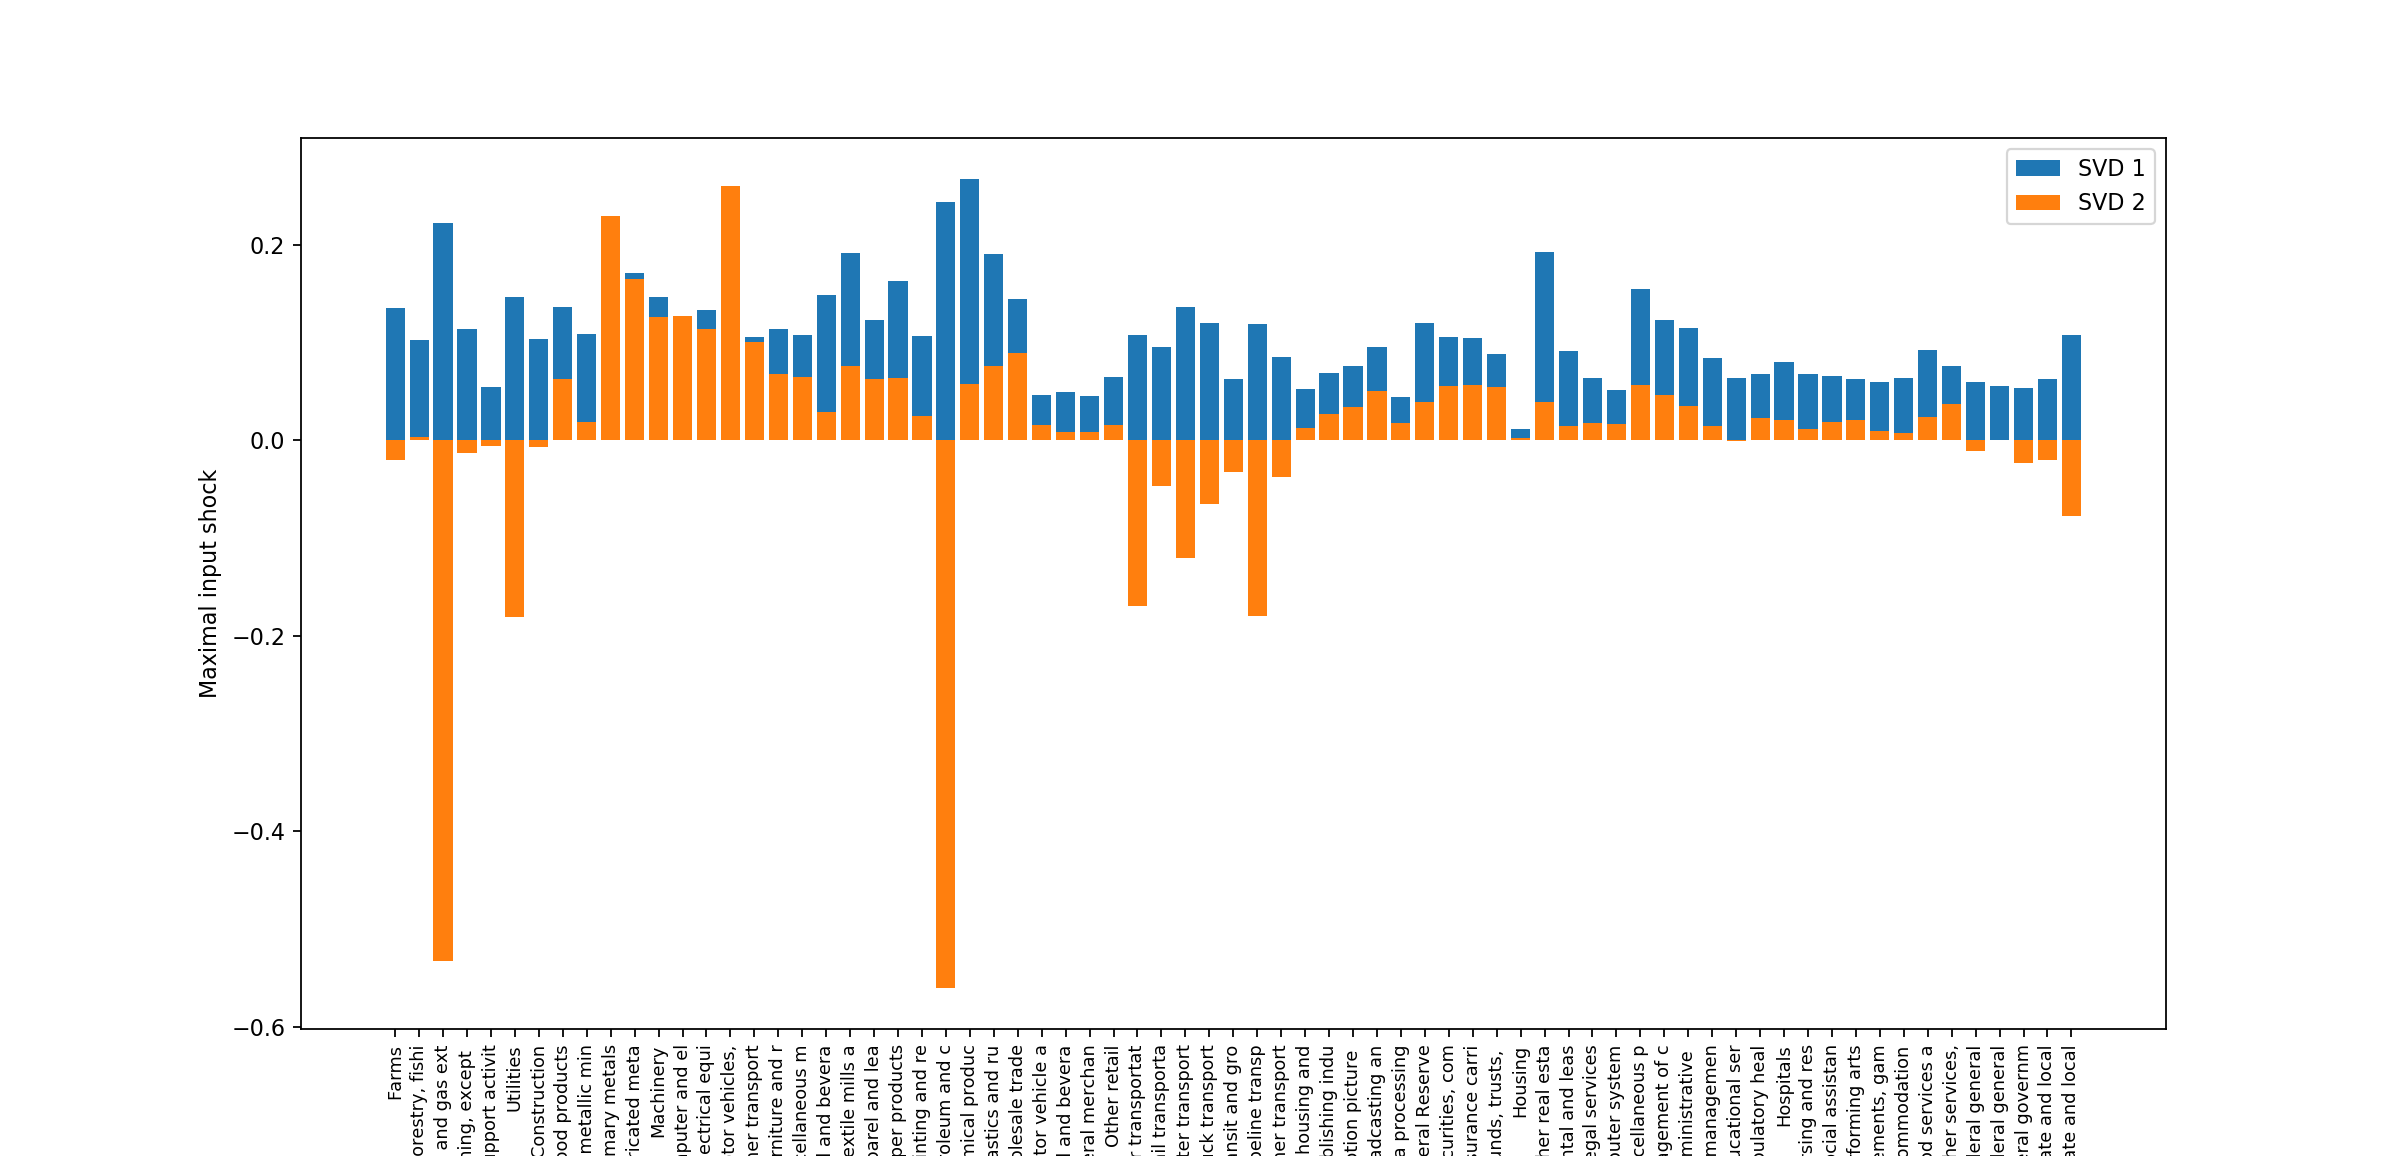

In [249]:
%matplotlib notebook
svd_plot(2005, 'input')

<IPython.core.display.Javascript object>


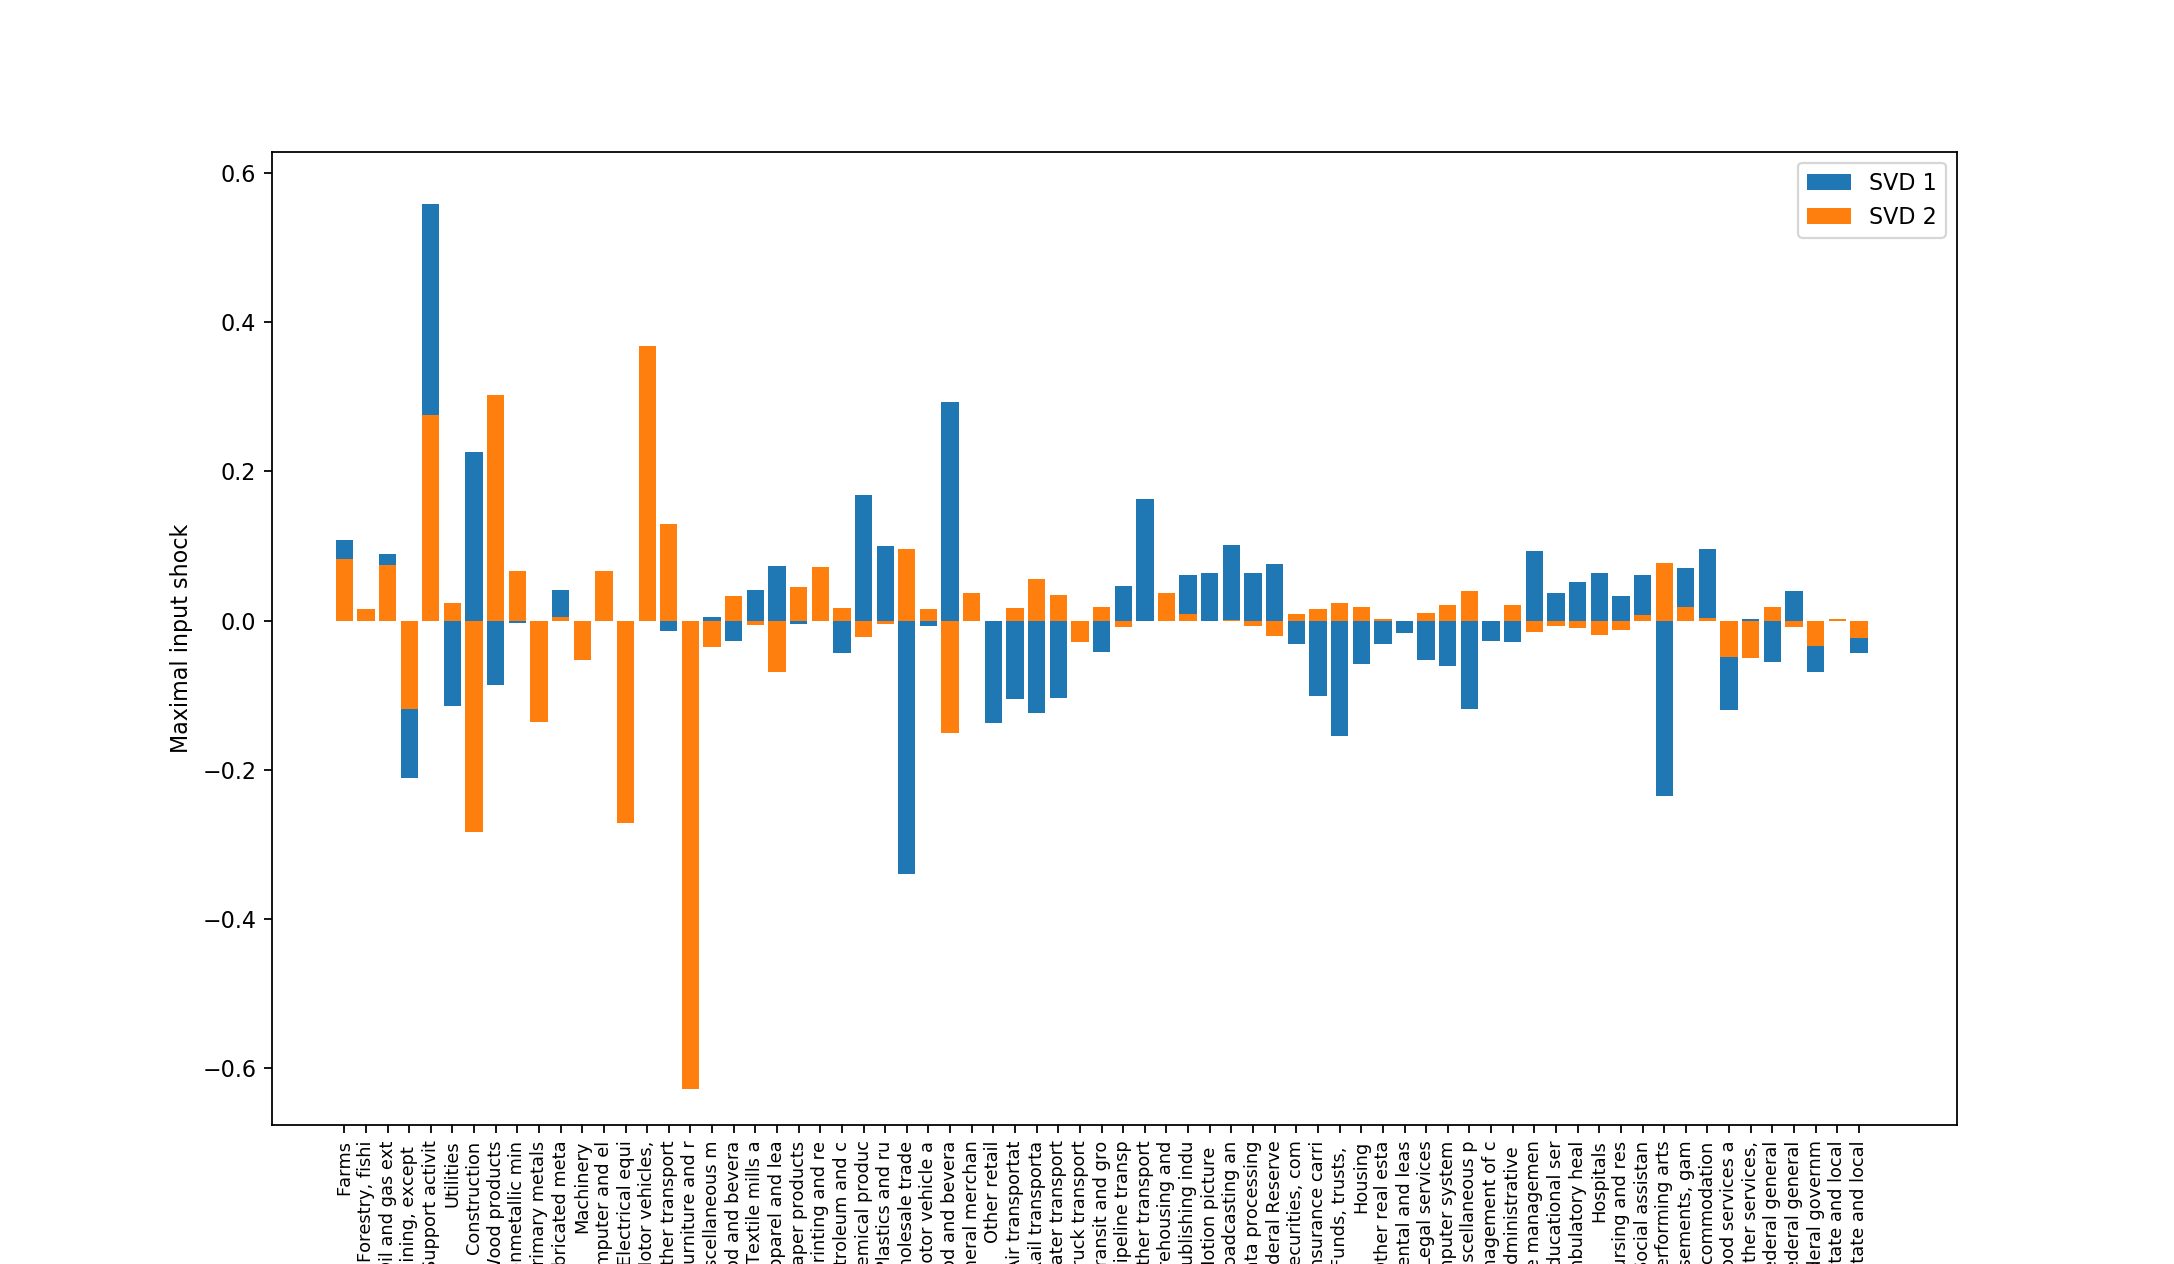

In [250]:
%matplotlib notebook
svd_plot(2005, 'output')